In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nc4 import *


In [2]:
print_file_metadata("MERRA2_100.tavg3_3d_asm_Nv.19800101.nc4", "compressed/wind")


[17:36:51] LOG: Loading compressed/wind/MERRA2_100.tavg3_3d_asm_Nv.19800101.nc4
<xarray.Dataset>
Dimensions:  (time: 8, lev: 72, lat: 361, lon: 576)
Dimensions without coordinates: time, lev, lat, lon
Data variables:
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...


In [5]:
def load_nc4_to_dataframe(filename: str, variable: str, folder: str = "compressed") -> pd.DataFrame:
    with open_xarray_dataset(filename, folder=folder) as dataset:
        packed_data = dataset.to_dataframe()[variable].array

    unpacked_data = packed_data.view("float16").astype("float16")
    dataframe = pd.DataFrame({variable: unpacked_data})

    with pd.option_context('mode.use_inf_as_na', True):
        dataframe.dropna(how="all", inplace=True)

    return dataframe


def load_variable_at_time_and_level(filename: str,
                                    variable: str,
                                    time: int,
                                    level: int,
                                    folder: str = "compressed") -> np.array:

    with open_xarray_dataset(filename, folder=folder) as dataset:
        data = np.array(dataset[variable][time][level])

    data = data.view("float16").astype("float16")
    return data

In [6]:
def plot_contour_at_time_and_level(filename: str, variable: str, time: int, level: int, folder: str = "compressed") -> None:
    data = load_variable_at_time_and_level(filename, variable, time, level, folder=folder)

    plt.contourf(data)
    plt.show()

[17:41:12] LOG: Loading compressed/wind/MERRA2_100.tavg3_3d_asm_Nv.19800101.nc4


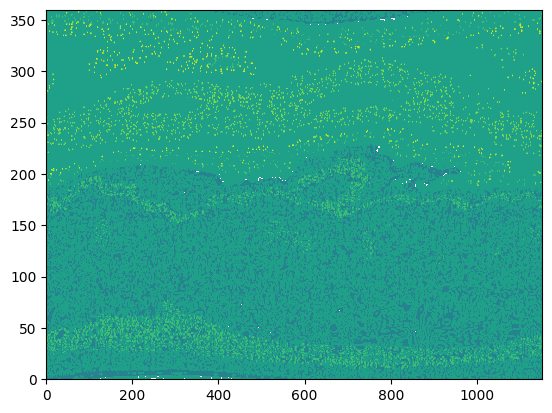

In [12]:
plot_contour_at_time_and_level("MERRA2_100.tavg3_3d_asm_Nv.19800101.nc4", "U", time=0, level=10, folder="compressed/wind")
